<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 · Aprenentatge automàtic · PAC1</p>

<p style="margin: 0; text-align:right;">2024-2 · Màster universitari en Ciència de dades (Data science)</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

**PAC 1: Preparació de dades**

L'objectiu principal d'aquesta primera PAC és que us familiaritzeu amb l'entorn de treball que utilitzareu a la resta de pràctiques de l'assignatura. Aquest entorn estarà format per un conjunt de dependències als mòduls de Python necessaris per poder executar de forma correcta el codi que resol la vostra PAC. Aquestes dependències les gestionarem gràcies a l'ajuda d'Anaconda, que, entre altres coses, ens proveeix d'un gestor d'entorns virtuals per a Python.

Una altra de les eines fonamentals del que serà el vostre nou entorn de treball serà Jupyter, que us permetrà treballar amb Notebooks (fitxers \*.ipynb), com el present enunciat, i on podreu executar el vostre codi cel·la a cel·la, mostrant els resultats intermedis que necessiteu per comprendre correctament què esteu fent en cada moment.

En aquesta primera PAC, un altre dels aspectes imprescindibles que cobrirem, tal com avança el seu títol, és el de la preparació de les dades. En aquesta PAC aprendrem a carregar diferents conjunts de dades o _datasets_, els combinarem i ens ajudarem d'eines de visualització per comprendre millor com es distribueix la dada, amb l'objectiu d'entendre com podem treure'n profit. A més, ens habituarem a treballar amb conjunts d'entrenament i test per confirmar si les conclusions que traiem sobre una part de les mostres es poden generalitzar i extrapolar a la resta.

En resum, en aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades seguint els passos llistats a continuació:
1. Càrrega i combinació dels diferents conjunts de dades (2 punts)<br>
   1.1. Real Estate Valuation<br>
   1.2. Taiwan Points of Interest (OpenStreetMap Export)<br>
2. Anàlisi de les dades (2.5 punts)<br>
   2.1. Anàlisi estadístic bàsic<br>
   2.2. Anàlisi exploratori de les dades<br>
3. Preprocessat de les dades (1 punt)<br>
4. Reducció de la dimensionalitat (2 punts)<br>
5. Conjunts desbalancejats de dades (1.5 punts)<br>
6. Cerca i combinació de nous conjunts de dades (1 punt)<br>

**Important:** cada un dels exercicis pot suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** existeix un tipus de cel·la especial per albergar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de cada PAC. Per canviar el tipus de cel·la a aquest tipus, trieu al menú: Cell $\to$ Cell Type $\to$ Markdown.

**Important:** la solució plantejada no ha d'utilitzar mètodes, funcions o paràmetres declarats "deprecated" en futures versions.

**Important:** és convenient que utilitzeu una llavor amb un valor fix (en aquest Notebook se us proposa la variable _seed_ inicialitzada a 100) en tots aquells mètodes o funcions que continguin alguna component aleatòria per assegurar-vos que obtindreu sempre el mateix resultat a les diferents execucions del vostre codi.

**Important:** no oblideu posar el vostre nom i cognoms a la següent cel·la.

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: Marc Cervera Rosell</strong>
</div>

Per a la realització de la pràctica necessitarem instal·lar i importar els següents mòduls:

In [1]:
!pip install smogn==0.1.2

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import BallTree
import smogn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Càrrega i combinació dels diferents conjunts de dades (2 punts)

En aquesta PAC treballarem amb un conjunt de dades en què cada mostra representarà la venda d'un immoble de la ciutat de Nova Taipei (Taiwan). Aquest conjunt de dades conté una sèrie de columnes que ens donaran informació de la transacció i d'algunes característiques de l'habitatge. No obstant això, volem enriquir aquest conjunt de dades afegint-li un nou atribut descriptiu i això ho farem utilitzant un segon _dataset_, en què cada mostra serà un punt d'interès de Taiwan, per calcular quants llocs d'interès hi ha propers a cada propietat.

Comencem amb la càrrega de dades:

## 1.1. Real Estate Valuation

El primer conjunt de dades, que a més és el principal, es diu _Real Estate Valuation_ i és un dels _datasets_ disponibles dins del [Repositori d'Aprenentatge Automàtic de la Universitat de Califòrnia a Irvine](https://archive.ics.uci.edu/).

A l'enllaç <https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set> teniu disponible tant l'esmentat _dataset_ _Real Estate Valuation_ com tota la informació rellevant per comprendre millor amb quin tipus de dada treballarem. Tal com s'ha avançat, les mostres d'aquest conjunt de dades estan relacionades amb vendes d'immobles a la ciutat de Nova Taipei (Taiwan).

En primer lloc, haureu de carregar al Notebook el conjunt de dades amb què treballarem durant la resta de la PAC. Per a això podeu descarregar-lo manualment de l'enllaç referit prèviament, encara que us aconsellem que instal·leu i utilitzeu el mòdul _ucimlrepo_ tal com s'explica a la mateixa pàgina del _dataset_.

**Nota:** juntament amb l'enunciat de la PAC hem adjuntat el fitxer *real+estate+valuation+data+set.zip* que podeu utilitzar en el cas que la pàgina citada prèviament no respongui.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> carrega el conjunt de dades "Real Estate Valuation" i mostra:

<ul>
  <li>El nombre i nom dels atributs descriptius (variables que podrien ser usades per predir la variable objectiu "y").</li>
  <li>El nombre de files (mostres) del conjunt de dades.</li>
  <li>Verifiqueu si hi ha o no "missing values" i en quines columnes.</li>
</ul>

Suggeriment: si uses ucimlrepo, explora els atributs _metadata_ i _variables_ de l'objecte obtingut.
    
Suggeriment: separa el conjunt de dades original en les variables "X" (atributs descriptius) i "y" (variable objectiu), encara que potser us pot ser d'utilitat en algun punt tenir-los també en un únic DataFrame combinats.
</div>

In [3]:
from ucimlrepo import fetch_ucirepo
real_estate_valuation_dataset = fetch_ucirepo(name='Real Estate Valuation') # Cèrrega del dataset

In [4]:
import json # Per visualitzar de manera senzilla el json de les metadades
print(json.dumps(real_estate_valuation_dataset.metadata, indent=4)) # Mostrar atribut metadata

{
    "uci_id": 477,
    "name": "Real Estate Valuation",
    "repository_url": "https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set",
    "data_url": "https://archive.ics.uci.edu/static/public/477/data.csv",
    "abstract": "The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ",
    "area": "Business",
    "tasks": [
        "Regression"
    ],
    "characteristics": [
        "Multivariate"
    ],
    "num_instances": 414,
    "num_features": 6,
    "feature_types": [
        "Integer",
        "Real"
    ],
    "demographics": [],
    "target_col": [
        "Y house price of unit area"
    ],
    "index_col": [
        "No"
    ],
    "has_missing_values": "no",
    "missing_values_symbol": null,
    "year_of_dataset_creation": 2018,
    "last_updated": "Mon Feb 26 2024",
    "dataset_doi": "10.24432/C5J30W",
    "creators": [
        "I-Cheng Yeh"
  

In [5]:
print(real_estate_valuation_dataset.variables) # Mostrar atribut variables

                                     name     role        type demographic  \
0                                      No       ID     Integer        None   
1                     X1 transaction date  Feature  Continuous        None   
2                            X2 house age  Feature  Continuous        None   
3  X3 distance to the nearest MRT station  Feature  Continuous        None   
4         X4 number of convenience stores  Feature     Integer        None   
5                             X5 latitude  Feature  Continuous        None   
6                            X6 longitude  Feature  Continuous        None   
7              Y house price of unit area   Target  Continuous        None   

                                         description  \
0                                               None   
1  for example, 2013.250=2013 March, 2013.500=201...   
2                                               None   
3                                               None   
4  number of conv

In [6]:
descriptive_attributes = real_estate_valuation_dataset.data.features # Atributs descriptius
target_attributes = real_estate_valuation_dataset.data.targets # Atributs objectiu
print("----- Atributs descriptius:-----\n", descriptive_attributes, "\n")
print("-----Atributs objectiu:-----\n", target_attributes)

----- Atributs descriptius:-----
      X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                  

In [7]:
number_descriptives = descriptive_attributes.columns
print("Atributs descriptius:\n", list(number_descriptives)) # Mostra dels noms dels atributs descriptius
print("Nombre d'atributs descriptius: ", len(number_descriptives)) # Mostra del nombre d'atributs descriptius

Atributs descriptius:
 ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
Nombre d'atributs descriptius:  6


In [8]:
real_estate_valuation_as_pandas = real_estate_valuation_dataset.data.original # Transformació del dataset complet a pandas
print("Nombre de files del dataset: ", real_estate_valuation_as_pandas.size)

Nombre de files del dataset:  3312


In [9]:
real_estate_valuation_as_pandas.isna().any()

No                                        False
X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> el conjunt de dades proposat és un problema d'aprenentatge automàtic supervisat o no?, en cas que ho sigui, de quin tipus d'aprenentatge supervisat estaríem parlant?
</div>

El conjunt de dades plantejat es correspon a un problema d'aprenentatge supervisat ja que es disposa d'una classe/etiqueta i s'utilitzen les variables descriptives per predir la variable objectiu. Concretament, es tracta d'un problema de regressió atès que la variable objetciu és un enter.

**Recursos externs consultats:**

[Repositori GitHub de la llibreria _ucilmrepo_](https://github.com/uci-ml-repo/ucimlrepo)

[Funció de pandas _isna()_](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)

[Funció _dumps()_ del mòdul _json_](https://docs.python.org/3/library/json.html)

## 1.2. Taiwan Points of Interest (OpenStreetMap Export)

El segon conjunt de dades, _Taiwan Points of Interest (OpenStreetMap Export)_, complementa el conjunt de dades inicial amb la informació dels punts d'interès presents a Taiwan.

La combinació d'ambdós conjunts de dades la farem mitjançant les seves coordenades geogràfiques. En el nostre cas, partint de la premissa que llocs amb un major nombre de punts d'interès propers podrien ser més cars, ens interessa calcular quants punts d'interès hi ha propers a cadascun dels immobles que s'han venut.

La cerca dels punts d'interès més propers a un immoble pot fer-se per mitjà de força bruta, recorrent tots els punts d'interès per a cadascun dels immobles. No obstant això, aquest mètode no és precisament el més eficient, per la qual cosa per al desenvolupament d'aquesta PAC us proposem la utilització de l'estructura de dades [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html). Aquest tipus d'arbre és una estructura de dades de partició espacial utilitzada per organitzar punts en un espai multidimensional. L'estructura _BallTree_ divideix els punts del conjunt de dades en un conjunt niat de boles, tal com es pot observar en el següent article: <https://medium.com/@geethasreemattaparthi/ball-tree-and-kd-tree-algorithms-a03cdc9f0af9>.

El conjunt de dades s'ha obtingut del següent enllaç: <https://data.humdata.org/dataset/hotosm_twn_points_of_interest>, i us el facilitem juntament amb l'enunciat al fitxer *hotosm_twn_points_of_interest_points_geojson.geojson*.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calcula el nombre de punts d'interès a menys de 100 metres de distància de cada immoble i afegeix-lo com un atribut descriptiu més:

<ul>
  <li>Carrega el conjunt de dades "Taiwan Points of Interest (OpenStreetMap Export)" utilitzant el mètode <i>read_file</i> de <i>geopandas</i>.</li>
  <li>Inicialitza una estructura de dades de tipus <i>BallTree</i> amb els punts d'interès per posteriorment fer cerques en ella.</li>
  <li>Calcula el nombre de punts d'interès propers a cada immoble del primer conjunt de dades per afegir-l'hi després com una nova columna.</li>
</ul>

Nota: la latitud i longitud de cada lloc d'interès ve emmagatzemada a la columna "geometry" del conjunt de dades en una estructura anomenada POINT, formada pels camps "y" (latitud) i "x" (longitud).

Nota: atès que la terra és més esfèrica que plana, és convenient utilitzar la mètrica de distància "<a href="https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno">haversine</a>" per al BallTree a més de treballar amb radians (no en metres).

Suggeriment: per a alguns càlculs serà necessari utilitzar el radi de la Terra en metres.
</div>

In [10]:
hotosm_dataset = gpd.read_file("hotosm_twn_points_of_interest_points_geojson.geojson")

In [81]:
# Extracció de les coordenades geogràfiques les estructures POINT
geographic_coordinates_hot_places = np.array([[coordinate.x, coordinate.y] for coordinate in hotosm_dataset.geometry])
geographic_coordinates_hot_places_radians = np.radians(geographic_coordinates_hot_places) # Converssió a radiants

In [79]:
ball_tree = BallTree(geographic_coordinates_hot_places_radians, metric="haversine") # Inicialització EEDD BallTree

In [87]:
# Coordenades de les cases del primer dataset
coordinates_houses = np.array([[real_estate_valuation_as_pandas["X6 longitude"][i],
                               real_estate_valuation_as_pandas["X5 latitude"][i]]
                              for i in range(real_estate_valuation_as_pandas.shape[0])])
coordinates_houses_radians = np.radians(coordinates_houses) # conversió a radiants

In [100]:
radius = 100 / 6378000 # distància, en metres, a la que volem buscar / radi de la Terra en metres
number_of_close_places = ball_tree.query_radius(coordinates_houses_radians, r=radius, count_only=True)

In [106]:
# Afegir el nombre de punts d'interès com una nova columna
real_estate_valuation_as_pandas["Number of closest points of interest"] = number_of_close_places
real_estate_valuation_as_pandas.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Number of closest points of interest
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,55
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,3
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,68


**Recursos externs consultats:**

[geopandas.GeoSeries.x](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.x.html#geopandas.GeoSeries.x)

[geopandas.GeoSeries.y](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.y.html)

[PANDAS - Manipulación de Datos con Python -> Informació atribut shape](https://joserzapata.github.io/courses/python-ciencia-datos/pandas/)

[geopandas.read_file()](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html)

[_How can I introduce the radius in query radius-BallTree sklearn, with untis of radians or km?_ -> Exemple semblant al plantejat per l'enunciat](https://stackoverflow.com/questions/63121268/how-can-i-introduce-the-radius-in-query-radius-balltree-sklearn-with-units-of-r)

# 2. Anàlisi de les dades (2.5 punts)

En aquest apartat visualitzarem cada una de les columnes o _features_ de la dada per comprendre millor quina distribució té.

## 2.1. Anàlisi estadística bàsica

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Fes una anàlisi estadística bàsica:
<ul>
  <li>Calcula estadístics descriptius bàsics: mitjana, mediana, desviació estàndard, ...</li>
  <li>Fes un histograma per a cada variable.</li>
</ul>
Suggeriment: pots fer servir la llibreria "pandas" i les seves funcions "describe" i "value_counts", així com les funcions "bar", "hist" i "hist2d" de <i>matplotlib</i> (aquesta última us vindrà bé per mostrar un mapa de calor combinant les latituds amb les longituds).
</div>

In [209]:
statistics = real_estate_valuation_as_pandas.describe()
statistics

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Number of closest points of interest
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,19.625604
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,25.882626
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,0.000000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,3.000000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,9.000000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,20.750000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,119.000000


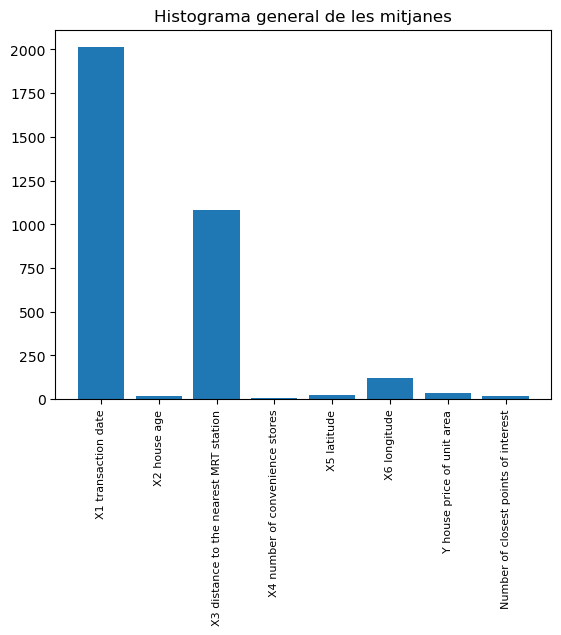

In [213]:
x_axis = np.array(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array(statistics.loc["mean"].values[1:]) # Descartant els valors de "No" (No = ID)
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma general de les mitjanes")
plt.show()

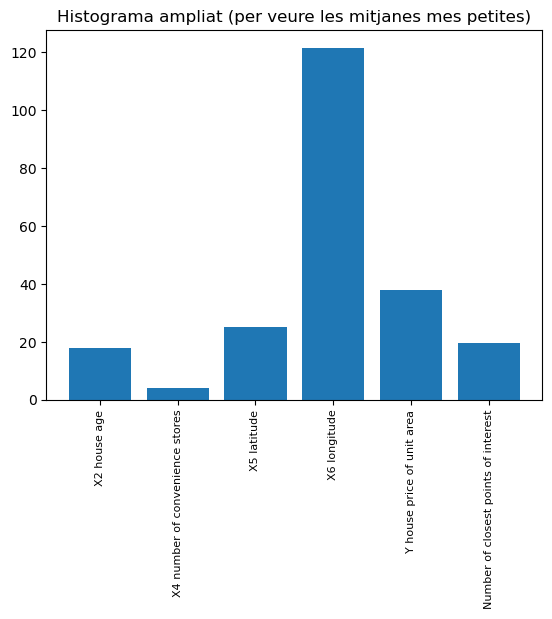

In [212]:
x_axis = np.array(["X2 house age", "X4 number of convenience stores", "X5 latitude", "X6 longitude",
                   "Y house price of unit area", "Number of closest points of interest"])
y_axis = np.array([statistics.loc["mean"].values[2], statistics.loc["mean"].values[4],
                 statistics.loc["mean"].values[5], statistics.loc["mean"].values[6], statistics.loc["mean"].values[7],
                 statistics.loc["mean"].values[8]])
plt.figure()
plt.bar(x_axis, y_axis)
plt.title("Histograma ampliat (per veure les mitjanes mes petites)")
plt.tick_params(axis='x', rotation=90,labelsize=8)
plt.show()

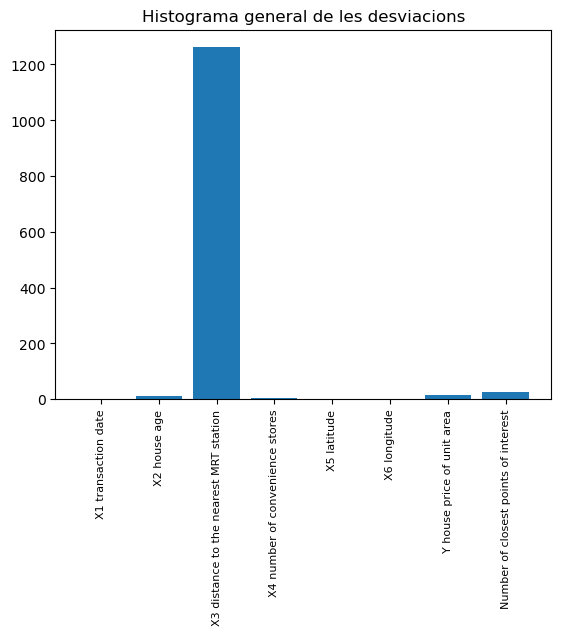

In [214]:
x_axis = np.array(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array(statistics.loc["std"].values[1:]) # Descartant els valors de "No" (No = ID)
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma general de les desviacions")
plt.show()

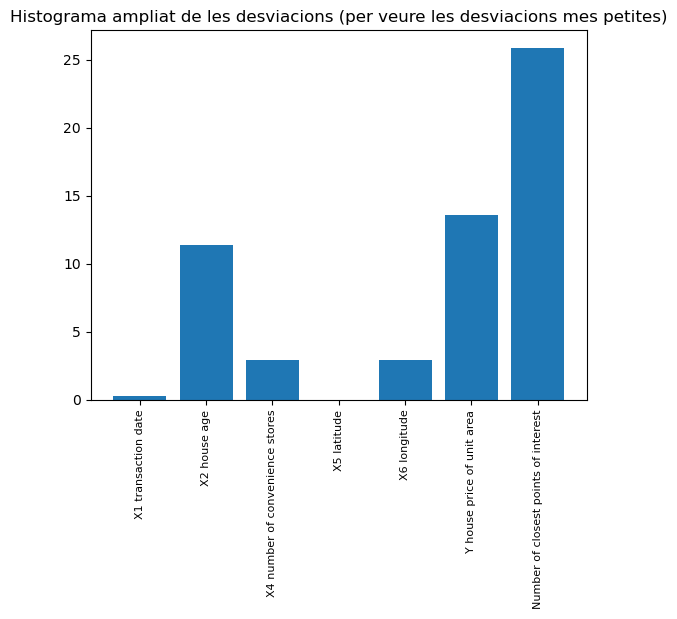

In [229]:
x_axis = np.array(["X1 transaction date", "X2 house age",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array([statistics.loc["std"].values[1], statistics.loc["std"].values[2],
                 statistics.loc["std"].values[4], statistics.loc["std"].values[5], statistics.loc["std"].values[4],
                 statistics.loc["std"].values[7], statistics.loc["std"].values[8]])
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma ampliat de les desviacions (per veure les desviacions mes petites)")
plt.show()

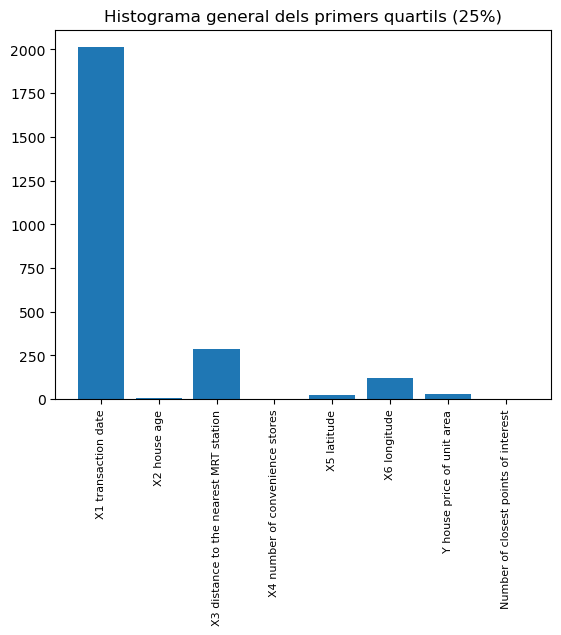

In [276]:
x_axis = np.array(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array(statistics.loc["25%"].values[1:]) # Descartant els valors de "No" (No = ID)
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma general dels primers quartils (25%)")
plt.show()

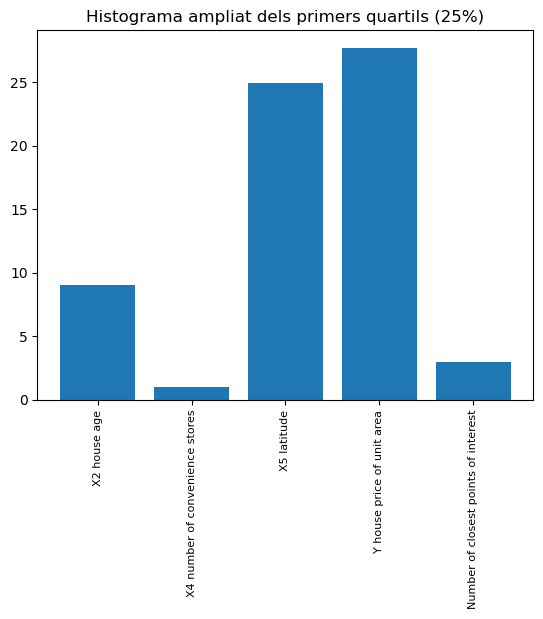

In [279]:
x_axis = np.array(["X2 house age", "X4 number of convenience stores", "X5 latitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array([statistics.loc["25%"].values[2], statistics.loc["25%"].values[4], statistics.loc["25%"].values[5],
                 statistics.loc["25%"].values[7], statistics.loc["25%"].values[8]])
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma ampliat dels primers quartils (25%)")
plt.show()

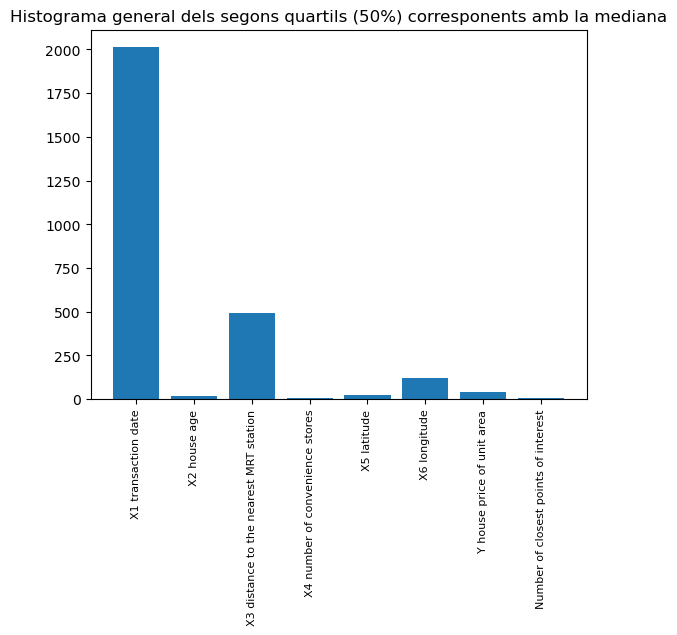

In [281]:
x_axis = np.array(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array(statistics.loc["50%"].values[1:]) # Descartant els valors de "No" (No = ID)
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma general dels segons quartils (50%) corresponents amb la mediana")
plt.show()

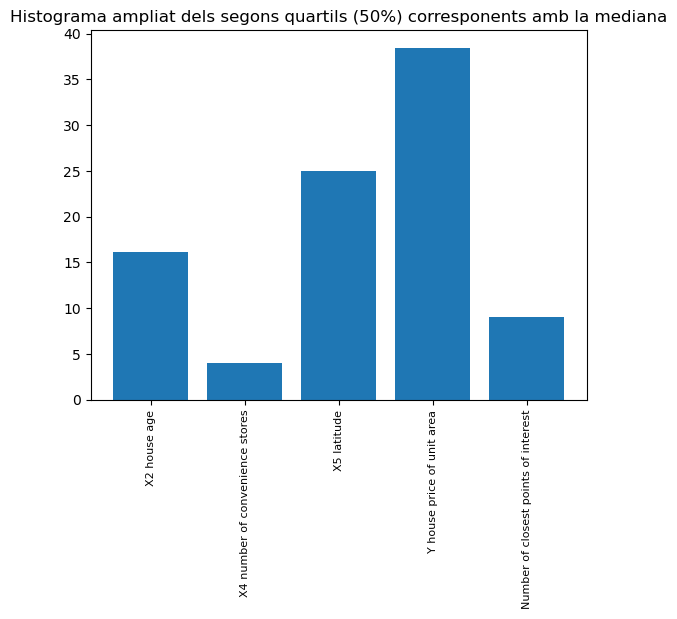

In [282]:
x_axis = np.array(["X2 house age", "X4 number of convenience stores", "X5 latitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array([statistics.loc["50%"].values[2], statistics.loc["50%"].values[4], statistics.loc["50%"].values[5],
                 statistics.loc["50%"].values[7], statistics.loc["50%"].values[8]])
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma ampliat dels segons quartils (50%) corresponents amb la mediana")
plt.show()

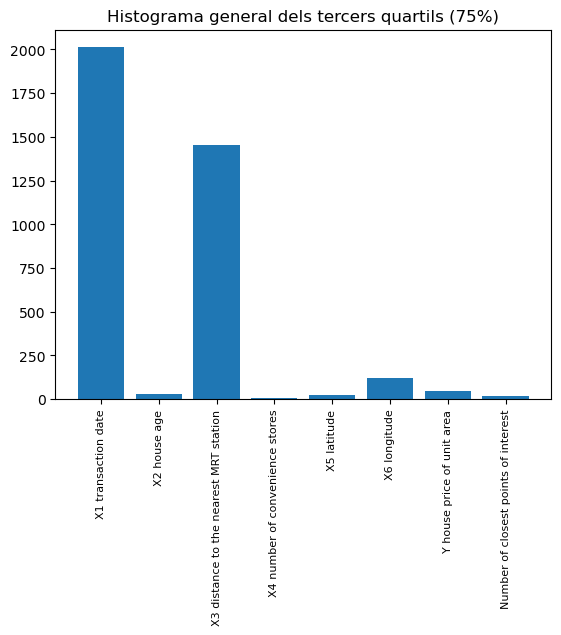

In [283]:
x_axis = np.array(["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station",
                  "X4 number of convenience stores", "X5 latitude", "X6 longitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array(statistics.loc["75%"].values[1:]) # Descartant els valors de "No" (No = ID)
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma general dels tercers quartils (75%)")
plt.show()

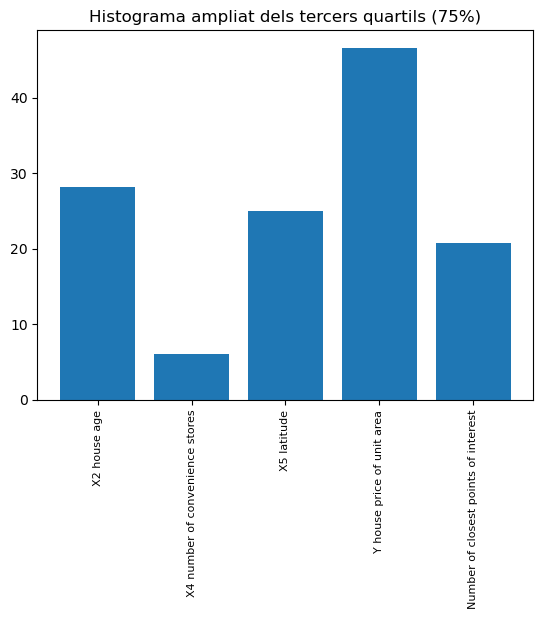

In [284]:
x_axis = np.array(["X2 house age", "X4 number of convenience stores", "X5 latitude", "Y house price of unit area",
                  "Number of closest points of interest"])
y_axis = np.array([statistics.loc["75%"].values[2], statistics.loc["75%"].values[4], statistics.loc["75%"].values[5],
                 statistics.loc["75%"].values[7], statistics.loc["75%"].values[8]])
plt.figure()
plt.bar(x_axis, y_axis)
plt.tick_params(axis='x', rotation=90, labelsize=8)
plt.title("Histograma ampliat dels tercers quartils (75%)")
plt.show()

**Recursos externs consultats:**

[Funció _loc()_ de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

[_tick_params_ del mòdul matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html)

[Construcció del gràfic _bar_ amb matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenta els resultats.
</div>

## 2.2. Anàlisi exploratòria de les dades

En aquest subapartat explorarem gràficament la relació dels atributs descriptius amb la variable objectiu i analitzarem les diferents correlacions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> usant una llibreria gràfica, com per exemple <i>matplotlib</i>, per a cadascuna de les variables descriptives, mostreu la distribució d'aquesta respecte a la variable objectiu, posant, per exemple, a l'eix X els valors de la variable descriptiva i a l'eix Y els de l'objectiu.
    
La finalitat d'aquest exercici és la d'identificar de manera visual i ràpida si alguns atributs ens permeten predir millor que altres el valor de la variable objectiu.

Suggeriment: es recomana fer servir <i>regplot</i>, de la biblioteca <i>seaborn</i>, ja que a més de la distribució de punts que se us demana us mostrarà si hi ha alguna tendència lineal positiva o negativa calculant una regressió lineal en cada cas.

Suggeriment: de manera addicional, és convenient veure la distribució geoespacial dels preus dels habitatges, per la qual cosa es recomana fer servir un scatter plot amb una escala de colors adequada relacionada amb el preu.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Mirant les gràfiques, quins atributs semblen tenir més influència en el valor final de la variable objectiu? Creus que amb aquests atributs seria suficient per poder determinar el preu de l'immoble?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> identifica i elimina els valors atípics del conjunt de dades i repeteix les gràfiques realitzades en l'exercici anterior per a analitzar com podrien estar afectant-nos aquest tipus de mostres.

És molt important que aquest pas el realitzeu en una còpia de la dada per a no perdre els valors atípics del conjunt amb el qual estem treballant, ja que continuarem treballant amb totes les mostres del dataset original en els següents apartats.

Nota: pots utilitzar, per exemple, el mètode IQR (Interquartile Range).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> explica què passa en les gràfiques quan es visualitzen els valors atípics. Com afecten aquests valors a la distribució de les dades i a les possibles relacions entre les variables?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calcula i mostra la correlació entre les variables numèriques.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenta els resultats.
</div>

# 3. Preprocessat de les dades (1 punt)

Un cop analitzats els atributs descriptius, és el moment de preparar-los perquè ens siguin útils de cara a predir valors.

En aquest apartat:
<li>Estandarditzarem els valors dels atributs descriptius numèrics perquè les seves escales no siguin molt diferents.</li>
<li>Separarem el conjunt de dades original en dos subconjunts: entrenament i test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Estandarditza tots els atributs descriptius numèrics, aquest serà el nou conjunt d'atributs descriptius amb el qual treballaré des d'ara.
<hr>
Suggeriment: Utilitza "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Separa els atributs descriptius escalats i la variable objectiu en els subconjunts d'entrenament i test.
<hr>
Suggeriment: Per separar entre train i test pots fer servir "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Explica si la decisió de transformar el conjunt de dades (estandardització) abans de realitzar la separació del conjunt de dades en els subconjunts d'entrenament i test és una bona idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> En aquest exercici has estandarditzat els valors dels atributs descriptius perquè les seves escales no siguin molt diferents. Què ens aporta estandarditzar els atributs descriptius? Hi ha alguna situació o escenari en què sigui imprescindible?
</div>

# 4. Reducció de la dimensionalitat (2 punts)

En aquest apartat reprendrem l'anàlisi gràfica de distribució de la variable objectiu al llarg de les mostres del conjunt de dades. En el segon apartat vam poder observar si les variables descriptives per separat eren molt prometedores o no de cara a la predicció. Aquí intentarem determinar si la seva combinació pot ajudar-nos a determinar el preu de l'immoble de millor manera que utilitzant els atributs per separat. Amb aquest propòsit, reduirem la dimensionalitat del problema a només dos atributs, que seran la projecció dels atributs descriptius originals, i observarem de quina manera es distribueixen les mostres en funció del seu valor objectiu.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Aplica el mètode de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions el dataset sencer amb totes les features.</li>
    <li>Amb l'objectiu de visualitzar si és possible predir eficientment el valor de la variable objectiu amb aquest mètode, genera un gràfic en 2D amb el resultat del PCA utilitzant una escala de colors que permeti distingir de forma senzilla si els valors alts o baixos s'acumulen més o menys en determinades zones.</li>
</ul>
    
Nota: Tingues cura, no incloguis la variable objectiu en la reducció de dimensionalitat. Volem explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

<hr>
Suggeriment: No és necessari que programis l'algoritme de PCA, pots fer servir la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Repeteix la reducció de dimensionalitat, però en aquest cas usant TSNE. Pots trobar més informació sobre aquest algoritme en el enllaç: <a href="https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que abans, genera un gràfic en 2D amb el resultat del TSNE utilitzant una escala degradada de colors per a la variable objectiu ("y"), amb la finalitat de visualitzar si és possible predir eficientment el valor de la variable objectiu amb aquest mètode.</li>
</ul>

<hr>
Suggeriment: No és necessari que programis l'algoritme TSNE, pots fer servir la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
Suggeriment: A part d'especificar el nombre de components, prova a fer servir els paràmetres "learning_rate" i "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Observant els dos gràfics, creus que ha funcionat bé la reducció de dimensionalitat? Creus que serà útil per a predir el valor de la variable objectiu? Quin dels dos mètodes ha funcionat millor? Per què obtenim resultats tan diferents?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> Què opines de TSNE com a opció per a reduir la dimensionalitat? Què et sembla que només tingui el mètode "fit_transform" però no tingui "transform"? Coneixes alguna altra opció que, amb unes prestacions similars, eviti els problemes que té TSNE?
</div>

# 5. Conjunts desbalancejats de dades (1.5 punts)

En els problemes amb variables objectiu discretes, amb valors acotats, és molt comú trobar conjunts de dades molt desbalancejats. A la indústria existeixen múltiples exemples, com la detecció de frau o la fuga de clients. No obstant això, aquest inconvenient també està present en problemes amb variable objectiu contínua, on pot apreciar-se que la distribució d'aquesta variable s'allunya molt de ser uniforme.

El cas del _dataset_ amb el qual estem treballant, tal com vam poder observar en l'apartat d'anàlisi de les dades, no presenta una distribució uniforme, per la qual cosa no existeixen tantes mostres d'immobles cars i/o molt barats en comparació amb el nombre d'habitatges de preus intermedis. Aquest fet pot portar a alguns algoritmes d'aprenentatge a prioritzar la predicció dels valors més comuns, marginant aquells que no són tan habituals. Amb la finalitat de mitigar aquesta problemàtica, existeixen diferents algoritmes de balanceig que opten per l'eliminació de les mostres més comuns (_undersampling_) o, per contra, intenten generar noves mostres per als valors més escassos de la variable objectiu (_oversampling_).

En aquest cas, ens proposem fer servir un algoritme que aplica ambdues idees: _under_ i _oversampling_, redistribuint les mostres perquè la variable objectiu presenti una distribució més uniforme.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Utilitza <i>smoter</i>, de la biblioteca <i>smogn</i>, per equilibrar la distribució de la variable objectiu. Un cop aplicat l'algoritme, analitza com ha quedat la distribució de la variable objectiu i el nombre de mostres totals que obtenim.
</div>

Amb l'objectiu de comprendre millor i de manera visual com es generen aquestes noves mostres farem servir, a partir d'ara, la descomposició a dues dimensions que millor s'hagi comportat en l'apartat anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> Mostra, mitjançant un scatter plot en funció de les dues components a les quals anteriorment he reduït el dataset, la distribució dels preus de venda del conjunt de dades original i l'obtingut en aplicar <i>smoter</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Comenta els resultats.
</div>

# 6. Cerca i combinació de nous conjunts de dades (1 punt)

En aquest apartat us animem a que busqueu de manera lliure un nou conjunt de dades que pugueu combinar d'alguna forma (a través d'algun o alguns atributs comuns) amb el conjunt de dades inicial per enriquir més encara la informació que tenim de cada habitatge de cara a estimar millor el seu preu.

És imprescindible que, una vegada tingueu el conjunt de dades ampliat amb el càlcul dels vostres nous atributs descriptius procedents del nou _dataset_, reexecuteu tot el Notebook, a excepció de la càrrega inicial del conjunt de dades _Real Estate Valuation_, per comprovar l'efecte d'aquesta ampliació.